# Machine Learning & Statistics Assessment 

#### Boston-House-Prices
In this assessment I plan to upload and view the Boston House Prices dataset and analyse using descriptive statistics and plots. I will also use inferential statistics to analyse whether there is a significant difference in the median house prices between houses that are along the Charles river and those that aren't. Finally I hope to use keras to create a neural network that can predict the median house price based on the other variables in the dataset.


#### The Python Libraries to be used
Pandas is a package providing fast, flexible and expressive data structures designed to make working with data both easy and initutive.

Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms.

Numpy is the fundamental package for scientific computing with Python. Besides it's scientific uses it can also be used as an efficient multi-dimensional container of generic data.

Seaborn is a Python data visualizition library based on Matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [4]:
import numpy as np
import pandas as pd
from sklearn import metrics
from pandas import DataFrame
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

#### The Dataset

The Boston House Prices data in this project was collected in 1978 by the US Census Service concerning housing in the area of Boston. It contains 506 enteries representing aggregate information about 14 features of homes from various suburbs in Boston. The dataset is accessible through the Python SKlearn library. 

In [5]:
from sklearn.datasets import load_boston # Importing the Boston House Dataset
boston_dataset = load_boston() # Assigning the dataset a reference

In [6]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names) # Iniatilizing the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
boston['MEDV'] = boston_dataset.target # Including the Median House Price (MEDV) data in the dataset.
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### Understanding the data
A breakdown of the different variables within the dataset keeping in mind each record in the database describes a Boston suburb or town.

CRIM per capita crime rate by town.

ZN proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS proportion of non-retail business acres per town.

CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX nitric oxides concentration (parts per 10 million).

RM average number of rooms per dwelling.

AGE proportion of owner-occupied units built prior to 1940.

DIS weighted distances to five Boston employment centres.

RAD index of accessibility to radial highways.

TAX full-value property-tax rate per 10,000usd.

PTRATIO pupil-teacher ratio by town.

B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT % lower status of the population.

MEDV median value of owner-occupied homes in $1000s

#### A look at the corroleation between the variables

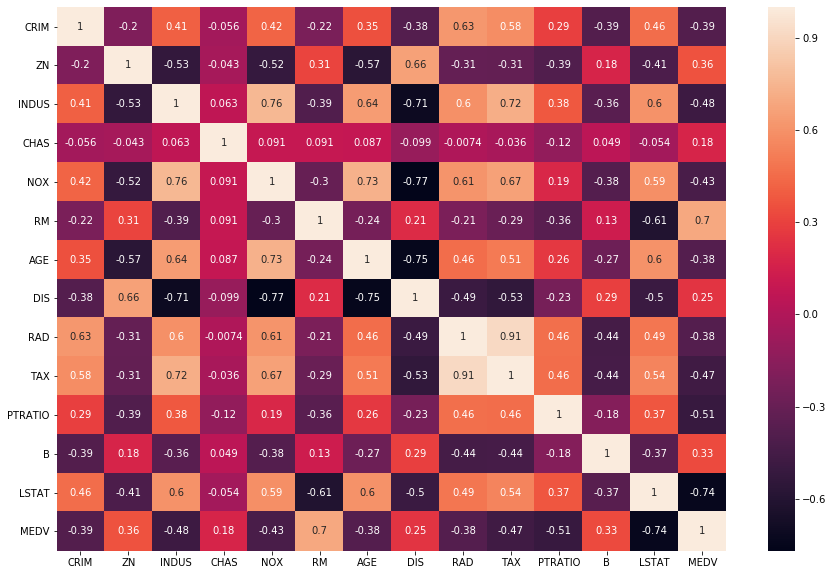

In [72]:
correlation_matrix = boston.corr()
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True)

Using a correlation matrix it's possible to measure the linear relationships between the variables within the dataset. The correlation cofficient ranges from -1 to 1. This indicates varibales with a strong positive correlation will be nearer to 1 and those with a negative correlation will be closer to -1.

The number of rooms per house (RM) has the closest positive correlation with the median house price (MEDV) 0.7. The variable with the most negative correlation to MEDV is the percentage lower status of the population (LSTAT).

#### Simplyifing the dataset for a quick look at the descriptive statistics

There are 14 different variables within this data set. For the purpose of this project I have identified five that I believe are the most interesting and also possibly the easiest to understand. I will use these to have a look at the dataset from a descriptive statistics point of view. These are not necessarily the variables I will be using later in the project to create a neural network that can predict the median house price.

MEDV - Median value of owner occuied homes. I will use this as the dependent variable and the one that I will compare the other selected variables to.

CRIM - Crime rate per capita by town.

CHAS - If houses have boundries along the Charles river or not.

RM - Average number of rooms per dwelling.

AGE - Proportion of owner occupied units built prior to 1940.

In [53]:
boston1 = boston.loc[:, ["CRIM", "CHAS", "RM", "AGE", "MEDV"]] # Tidying up the data to focus on the five variables I mentioned above.
boston1.head(10) # Creating new dataframe to represent only the variables I am interested in

,CRIM,CHAS,RM,AGE,MEDV
0,0.00632,0.0,6.575,65.2,24.0
1,0.02731,0.0,6.421,78.9,21.6
2,0.02729,0.0,7.185,61.1,34.7
3,0.03237,0.0,6.998,45.8,33.4
4,0.06905,0.0,7.147,54.2,36.2
5,0.02985,0.0,6.430,58.7,28.7
6,0.08829,0.0,6.012,66.6,22.9
7,0.14455,0.0,6.172,96.1,27.1
8,0.21124,0.0,5.631,100.0,16.5
9,0.17004,0.0,6.004,85.9,18.9


In [54]:
boston.describe() # A look at the statistics of the data

,CRIM,CHAS,RM,AGE,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,0.069170,6.284634,68.574901,22.532806
std,8.601545,0.253994,0.702617,28.148861,9.197104
min,0.006320,0.000000,3.561000,2.900000,5.000000
25%,0.082045,0.000000,5.885500,45.025000,17.025000
50%,0.256510,0.000000,6.208500,77.500000,21.200000
75%,3.677083,0.000000,6.623500,94.075000,25.000000
max,88.976200,1.000000,8.780000,100.000000,50.000000


In [55]:
boston1.sort_values(by="MEDV", ascending=False) 
boston1.head(5)

,CRIM,CHAS,RM,AGE,MEDV
0,0.00632,0.0,6.575,65.2,24.0
1,0.02731,0.0,6.421,78.9,21.6
2,0.02729,0.0,7.185,61.1,34.7
3,0.03237,0.0,6.998,45.8,33.4
4,0.06905,0.0,7.147,54.2,36.2


#### A look at the Data Distribution

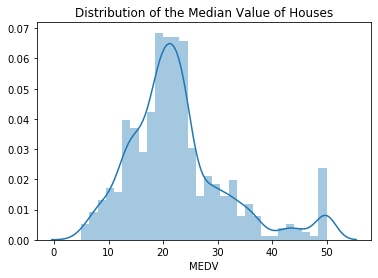

In [56]:
sns.distplot(boston1['MEDV'], bins=30)
plt.title ("Distribution of the Median Value of Houses")
plt.show()

The distribution of the MEDV is a normal distribution with a slight outlier at the more expensive median house price end of the scale. This indicates that the median house prices in the majority of the towns/suburbs is the same and then there are a smaller number of towns where the prices are lower and the same with higher prices although at the extreme end of the scale there are quite a few towns and suburbs where the median price is very high.

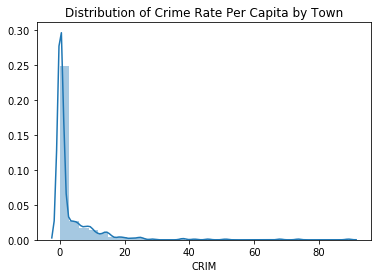

In [57]:
sns.distplot(boston1['CRIM'], bins=30)
plt.title ("Distribution of Crime Rate Per Capita by Town")
plt.show()

The distribution of the CRIM is a gamma distribution with the results skewed one side indicating that the crime rate per capita must be higher in a specific number of towns with other towns having a significantly lower crime rate.

<function matplotlib.pyplot.show(*args, **kw)>

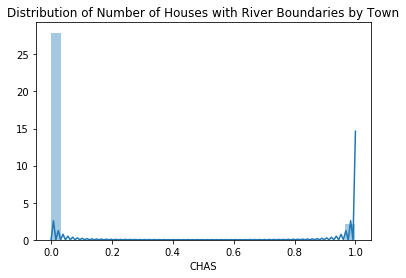

In [58]:
sns.distplot(boston1['CHAS'], bins=30)
plt.title ("Distribution of Number of Houses with River Boundaries by Town")
plt.show

The closest distribution the CHAS looks like is a beta distribution but given that the houses either have a river boundary or don't means there are only going to be an upper or lower bound and so the above is not a true distribution. It does clearly show that there is a much higher number of house without a river boundary than ones with a river boundary.

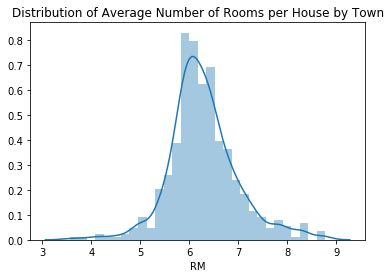

In [59]:
sns.distplot(boston1['RM'], bins=30)
plt.title ("Distribution of Average Number of Rooms per House by Town")
plt.show()

Like the MEDV, the RM distribution is normal. Again this would indicat the majority of houses in each town/suburb have a median number of rooms tapering off at both sides to indicate a much smaller number of houses with fewer rooms while also a a much smaller number of houses with many rooms. The same distribution as MEDV could indicate a possible relationship between the median house price and the number of rooms in a house.

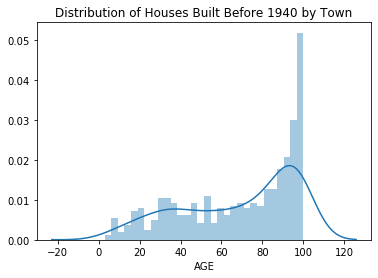

In [60]:
sns.distplot(boston1['AGE'], bins=30)
plt.title ("Distribution of Houses Built Before 1940 by Town")
plt.show()

The distribution of the AGE also appears to be a gamma distribution in that the results are skewed to one side. The shape of the graph indicates that certain towns may have had most of the building done before 1940 with the lower end of the graph perhaps indicating newer towns/suburbs that may only have been developed after 1940.

#### A look at the relationships of the variables

Text(0.5, 1, 'Relationship between Median House Price and Crime Rate per Town')

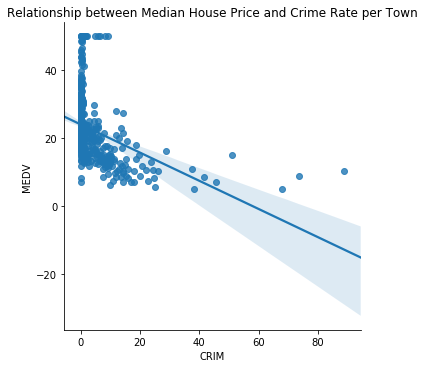

In [61]:
sns.lmplot(x="CRIM", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Crime Rate per Town")

From a practical point of view, I would have expected a closer relationship between MEDV and CRIM where the higher the crime rate per town the lower the median house price but as per the correlation matrix and scatter plot this is not the case and it is hard to see any real relationship between the two variables.

Text(0.5, 1, 'Relationship between Median House Price and Houses on or off the Charles River')

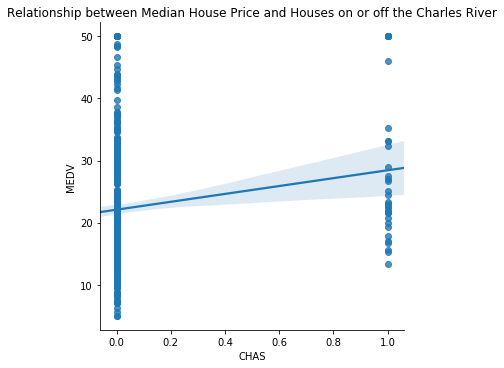

In [62]:
sns.lmplot(x="CHAS", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Houses on or off the Charles River")

Looking at the scatterplot there seems to be a slightly higher MEDV for houses on the Charles River but I will explore these two variables in further detail using inferential statistics later in this project.

Text(0.5, 1, 'Relationship between Median House Price and Number of Rooms per House')

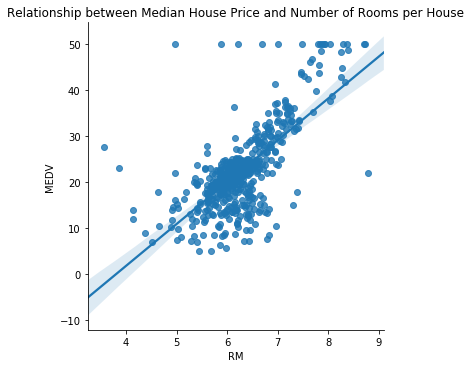

In [63]:
sns.lmplot(x="RM", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Number of Rooms per House")

Looking at the scatter plots comparing the variables as per the corrroleation matrix, the obvious relationship from a descriptive statistics perspective is between the Median House price and the number of rooms. The graph shows that the majority of houses have between 5 to 7 rooms and the majority of them fall within the Median House range of 10 to 30 thousand. As the MEDV increases the number of rooms per house also increases.

Text(0.5, 1, 'Relationship between Median House Price and Age of Houses')

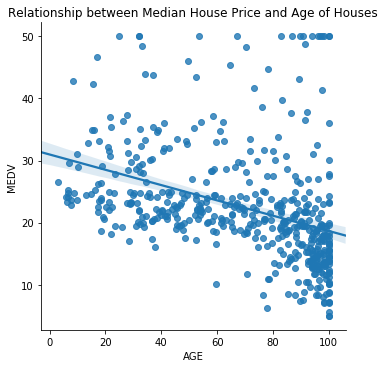

In [64]:
sns.lmplot(x="AGE", y="MEDV", data=boston1)
plt.title("Relationship between Median House Price and Age of Houses")

The scatterplot between the MEDV and AGE of the house would support the correlation matrix indicating that there is not a strong relationship between these two variables.

#### Using inferential statistics to analyse MEDV and CHAS variables

In [74]:
# Creating a dataframe containing just MEDV and CHAS
boston2 = boston.loc[:, ["CHAS", "MEDV"]]

In [75]:
# Creating a dataframe for houses on the Charles River
onriver = boston2[boston2.CHAS == 1]
onriver.head(10) 

,CHAS,MEDV
142,1.0,13.4
152,1.0,15.3
154,1.0,17.0
155,1.0,15.6
160,1.0,27.0
162,1.0,50.0
163,1.0,50.0
208,1.0,24.4
209,1.0,20.0
210,1.0,21.7


In [76]:
# Creating a dataframe for houses off the Charles River
offriver = boston2[boston2.CHAS == 0]
offriver.head(10)

,CHAS,MEDV
0,0.0,24.0
1,0.0,21.6
2,0.0,34.7
3,0.0,33.4
4,0.0,36.2
5,0.0,28.7
6,0.0,22.9
7,0.0,27.1
8,0.0,16.5
9,0.0,18.9
